## Computing Artifact
### Author: Brian KYANJO
#### Supervisor: Prof. Donna Calhoun
###### Program: Computing PHD (Computational Math Science and Engineering)
This is a notebook where all test cases are tested. The mathematics and further details behind the implemented solvers are well discussed in the pdf file attached named [brian_kyanjo_synthesis_duplicate.pdf](./brian_kyanjo_synthesis_duplicate.pdf)

__Usage__:
The User is prompted to select solvers, cases, itype, mq, limiter choice order of accuracy (first or second), spatial and temporal domains, number of equations, cfl, spartial resolution (mx), and the maximum wave speed. Selection of these determines the nature of the solution to be output. The following are the procedures followed while selecting variables of the users choice:

* Cases:
    * Their are 11 choices available for the user to choice depending on the output they need or the problem test they are simulating. 
    * Cases = 0-6, are special problems for only wet states, and these can be simulated by both our exact solver and the finite volume scheme (FVM) slovers. for instance if you want simulate the temporal evolution of dam break problem then you will have to select case 4, choose a solver of your interest, order of accuracy, and may be choose the final time step for your simulation.
    * Case = 7, is a user defined case, this is open to a user to decide which height or velocity values they would want to explore, the option to do this is provided in the Riemannsoln function in which values: $h_l, h_r, u_l,$ and $u_r$ must be selected by the user. However, the user has to be carefull here, since our FVM schems can't handle dry states, therefore in any case where the user selects $h<=0$, itype = 0 must be selected since its only the exact Riemann solver which can handle the dry states. Otherwise the user is open to test any height values(h>0) and velocities.
    * Cases = 8-10, Are special cases with presence of dry states, these are only simulated by exact solver, therefore a user has to select itype=0, inorder to perform simulations containing dry regions. 
* itypes:
    * itype = 0, is selected when the user is only interested to perform simulations and visualize the exact Riemann solver only. This itype is open to all cases a user can select.
    * itype = 1, is selected when the user wants to simulate and visualize the comparision between the exact solver and the FVM scheme, however, this comparison is only available for cases: 0-6, and for case = 7 if and only if $h<=0$, otherwise the function Riemannsoln will raise an exception notifying the user to select values $h>0$ or consider using itype = 0, for that specific problem.
    * itype = 2, is choosen only if the user is interested in simulating and visualizing the comparision between the 3 FVM solvers with the exact Riemann solver for a specific problem, however, the same precautions in itype = 1, must be taken in runing itype = 2 for presence of dry states $(h=0)$.
* mq:
    * mq = 0, is selected only when the user wants to exam the temporal evolution of the height field, and this is open to all kinds of cases, a user may select.
    * mq = 1, is selected only when the user wants to exam the temporal evolution of the momentum field, and this is open to all kinds of cases, a user may select.
    * mq = 2, is selected only when the user wants to simulate the temporal evolution of the velocity field, and this is only available for itype = 0 and all kinds of cases, a user may select, since our FVM solvers only return Riemann solutions for height and momentum fields.
* solvers:
    * There are 3 different FVM solvers that were designed in this artifact to validate our exact solver.
    * solver = 0, is chosen if the user is interested in testing the Roe solver, this option is available only when a user selects itype = 1. 
    * solver = 1, is selected if the user wants to simulate the selected problem using the flux wave based solver, this option is available only when a user selects itype = 1. 
    * solver = 2, is selected if the user wants to simulate the selected problem using the fwave based solver, this option is available only when a user selects itype = 1. 
* limiter_choice:
    * In this artifact we selected 4 types of limiters: MC, minmod,vanleer,and suberbea, to filter unwanted oscillations in our second order accurate FVM results. This option is only employed if second_order = True, case = 0-7, and itype = 2-3.
    * limiter_choice = 'minmod', is chosen if the user is interested in running simulations using the minmod limiter.
    * limiter_choice = 'MC', is chosen if the user is interested in running simulations using the MC limiter.
    * limiter_choice = 'superbea', is chosen if the user is interested in running simulations using the superbea limiter.
    * limiter_choice = 'vanleer', is chosen if the user is interested in running simulations using the vanleer limiter.
* second_order:
    * The FVM solvers are both first order and second order accurate and this option is only possible if and only if case = 0-7, and itype = 2-3, to select between which order of accuracy a user wants, the user has to speify either that:
    * second_order = True, for second order accuracy.
    * second_order = False, for first order accuracy.
* spartial domain:
    * The user is open to choose there x (ax and bx) and y (ay and by) bondaries depending on the geometry of the problem, since different problems vary in geometeries.
* Temporal domain:
    * This is user defined, depending on the time and stage the user is interested in simulating. Note chosing Tfinal = 0, will display the Riemann problem.
* meqn:
    * For this artifact we shall fix the number of equations to 2, since we are taking an assumption that the number of equations = number of waves. Changing this may blow up the solvers.
* gravity:
    * for simplicity we choose gravity to be 1.
* cfl:
    * This is user defined, the user is free to choose a cfl < 1 otherwise the solution becomes unstable, however this will influence the computational time and maximum speed (umax). The more the cfl is close to 1, the more stable and computationally first the solvers will be. So for better performance we selected cfl = 0.9.
* spatial resolution:
    * This is also user defined, the user may choose the spatial resolution (mx) to be any number depending on the comparisons they are making or error they want to obtain, or even the resolution they are interested in. 
* maximum wave speed:
    * The maximum wave speed (umax) depends on time, so we have to find a maximum that works for $t$ in $[0,T]$ and this is highly affected by the cfl choosen. The user may decide not to change this for stable and computationally fast results.

__Imported module:__ The [test.py](./test.py) module that is imported contains our default `problem test cases`, the `initial` and `boundary conditions`, `bathymetry terms`, the plot function `Riemannsoln`, imports [approximate_solver.py](./approximate_solver.py) that contains the FVM Reimann solvers, and also imports the exact Riemann solver named [exact_solver.py](./exact_solver.py). 

__Note:__ On calling the function `Riemannsoln` from the test module, the function will visualize the Riemann solution for the problem, solvers, itype, etc, choosen. This will print out the solver used if its itype 1 or 2, problem solved, change in the time step (dt), and number of time steps used.     
   

In [1]:
#Problem test
case = 4 # 0 = left going shock
         # 1 = right going shock
         # 2 = right going rarefaction
         # 3 = left going rarefaction
         # 4 = dambreak
         # 5 = Allrarefaction
         # 6 = Allshock
         # 7 = User defined
         # 8 = left dry state
         # 9 = middle dry state
         # 10 = right dry state
         

itype = 2 # 0 = presence  dry states (Only exact solver)
          # 1 = no dry states (Only a selected approximate solver is compared to the exact)
          # 2 = no dry states (All solvers)
    
mq = 0    # mq = 0 : Height field
          # mq = 1 : Momentum field
          # mq = 3 : velocity field (Only for itype = 0)

#choice of the Riemann solver (no dry states)       
solver = 2 # 0 = Roe-solver
           # 1 = flux-decomposition solver
           # 2 = fwave Solver with source term

limiter_choice = 'minmod' #MC 
                          #minmod
                          #superbea
                          #vanleer
                
second_order = True

# Spatial domain
ax = -6
bx = 6

#middle dry state choose: ay = -0.1, by = 0.2
#left dry state choose: ay = -0.1, by = 1.2
#right dry state choose: ay = -0.1, by = 1.2
ay = 0 
by = 3

meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 1

# Numerical parameters
cfl = 0.9

mx = 128 #number of spatial points

# Estimate maximum wave speed. 
umax = 1.7

#### Sample test and plot

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib
Problem: dam break problem 
 	 hl =  2 
 	 hr =  1 
 	 ul =  0 
 	 ur =  0
solver used is: f-wave
dt = 4.7619e-02
Number of time steps = 21


<IPython.core.display.Javascript object>


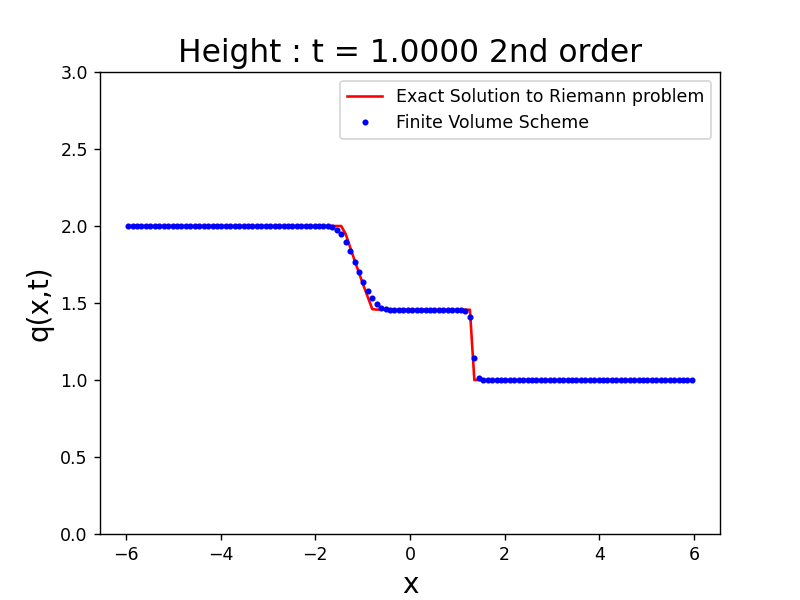

In [2]:
%matplotlib notebook
%pylab
%reload_ext autoreload
%autoreload 2

import test #Conatins test cases, plot function,Intial and Boundary conditions

test.Riemannsoln(umax,to,mq,case,itype,g,ax,bx,ay,by,mx,\
                Tfinal,limiter_choice,second_order,meqn,\
                solver,cfl,hl=1.0,ul=0.0,hr=0,ur=0.5)